# Worldwide DATA

![](https://img.freepik.com/free-vector/global-network-connection-world-wide-web-connection-lines_110633-43.jpg?size=426&ext=jpg)

## Tomer peor 315712422


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
url = 'https://raw.githubusercontent.com/ANproject1/Part_A/main/world_data.csv'
world_wide = pd.read_csv(url).copy()
world_wide.head()

,Country Name,Country Code,year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",...,Permanent cropland (% of land area),"Population, total",Rural land area (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8996973.0,NaN,NaN,NaN,8241137.0,91.599,NaN,NaN,NaN
1,Afghanistan,AFG,1961,NaN,NaN,NaN,57.745918,377000.0,120.0,0.156863,...,0.076586,9169410.0,NaN,NaN,NaN,8373138.0,91.316,1.589040,NaN,652860.0
2,Afghanistan,AFG,1962,NaN,NaN,NaN,57.837821,377600.0,150.0,0.194805,...,0.091903,9351441.0,NaN,NaN,NaN,8512056.0,91.024,1.645479,NaN,652860.0
3,Afghanistan,AFG,1963,NaN,NaN,NaN,57.914407,378100.0,200.0,0.258065,...,0.091903,9543205.0,NaN,NaN,NaN,8657977.0,90.724,1.699758,NaN,652860.0
4,Afghanistan,AFG,1964,NaN,NaN,NaN,58.010906,378730.0,200.0,0.256410,...,0.111816,9744781.0,NaN,NaN,NaN,8810646.0,90.414,1.747967,NaN,652860.0


Checking the data settings

In [43]:
world_wide=world_wide.rename(columns={'Country Name':'Country'})
world_wide.dtypes

Country                                                                                        object
Country Code                                                                                   object
year                                                                                            int64
Access to electricity (% of population)                                                       float64
Access to electricity, rural (% of rural population)                                          float64
Agricultural irrigated land (% of total agricultural land)                                    float64
Agricultural land (% of land area)                                                            float64
Agricultural land (sq. km)                                                                    float64
Agricultural machinery, tractors                                                              float64
Agricultural machinery, tractors per 100 sq. km of arable land                    

the dataset contains information from years 1960-2020, were only intrested from year 2000 and forward.

In [44]:
world_wide = world_wide[world_wide['year'] >= 2000]
world_wide.shape

(5544, 55)

---
# 1. Arranging the data

## 1.1 missing values

There's a large amount of columns, we would like to filter some of them.

In [45]:
world_wide.isnull().sum().sort_values(ascending=False)

Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)                 5136
Rural land area where elevation is below 5 meters (% of total land area)                      5098
Rural land area where elevation is below 5 meters (sq. km)                                    5094
Rural land area (sq. km)                                                                      5094
Rural population living in areas where elevation is below 5 meters (% of total population)    5094
Agricultural machinery, tractors per 100 sq. km of arable land                                4916
Agricultural machinery, tractors                                                              4884
Average precipitation in depth (mm per year)                                                  4791
Agricultural irrigated land (% of total agricultural land)                                    4688
Net migration                                                                                 4584
Literacy r

There's no use to work with columns that got more then 3000 of NAN values (more than 50%)..

In [46]:
new_df=pd.DataFrame(world_wide.isnull().sum().sort_values(ascending=False))
drop_features=new_df[new_df[0]>3000].index
world_wide=world_wide.drop(columns=drop_features)
world_wide.isnull().sum().sort_values(ascending=False)

Fertilizer consumption (kilograms per hectare of arable land)                        2557
Arable land (hectares)                                                               2048
Agricultural raw materials exports (% of merchandise exports)                        1564
Agricultural raw materials imports (% of merchandise imports)                        1536
Cereal yield (kg per hectare)                                                        1515
Land under cereal production (hectares)                                              1514
Cereal production (metric tons)                                                      1496
Crop production index (2004-2006 = 100)                                              1471
Livestock production index (2004-2006 = 100)                                         1454
Permanent cropland (% of land area)                                                  1442
Food production index (2004-2006 = 100)                                              1437
Arable lan

## 1.2 Transformations and understanding

**undrestanding the data:**
The info that contained in the dataset needed to be exists every year. the chance of being 0 or non-existent (nan) is not possible.
so we can conclude that NAN values have to be a report mistake or forgeten to be updated.

were ussing fillna function with **groupby** inside by country to prevent leakage of incorrect information from one country to another.

In [47]:
world_wide.fillna(world_wide.groupby('Country').transform('median'), inplace=True)

After arranging the data.\
there are over 250 countries in the dataset, which contains information about agriculture, population, employment, death and more for each country ...

**and our question is:**
## how did each country go along the years?

using **groupby** command to caculate the mean according to the requested years.

In [48]:
world_wide= world_wide.groupby('Country').mean()
world_wide.head()

,year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)",Agricultural land (% of land area),Agricultural land (sq. km),Agricultural raw materials exports (% of merchandise exports),Agricultural raw materials imports (% of merchandise imports),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)",Arable land (% of land area),...,Land under cereal production (hectares),Livestock production index (2004-2006 = 100),Mineral rents (% of GDP),"Mortality rate, infant (per 1,000 live births)",Permanent cropland (% of land area),"Population, total",Rural population,Rural population (% of total population),Rural population growth (annual %),Surface area (sq. km)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2010,59.717459,50.364246,58.033371,378876.666667,8.839448,0.948878,26.028548,3.457134e+09,11.903376,...,2.829380e+06,100.886190,0.001718,66.414286,0.177461,2.928106e+07,2.228462e+07,76.300405,2.919897,652860.0
Albania,2010,99.995238,100.000000,42.375131,11610.785900,4.326071,0.934849,19.441444,1.969125e+09,21.863399,...,1.481326e+05,101.784762,0.231521,13.821429,3.534411,2.947122e+06,1.432264e+06,48.458500,-2.513548,28750.0
Algeria,2010,99.586994,98.645244,17.243179,410687.680432,0.021376,1.752884,9.520649,1.357122e+10,3.149916,...,2.626491e+06,112.023810,0.098627,25.457143,0.362310,3.619142e+07,1.181943e+07,33.046714,-0.406291,2381740.0
American Samoa,2010,NaN,NaN,24.342858,48.685715,NaN,NaN,NaN,NaN,14.928571,...,NaN,100.479524,0.000000,NaN,9.414286,5.710138e+04,7.008310e+03,12.277786,0.239707,200.0
Andorra,2010,100.000000,100.000000,44.249240,207.971430,1.201181,0.405082,NaN,NaN,1.700101,...,NaN,NaN,0.000000,4.480952,NaN,7.802767e+04,8.311976e+03,10.563119,3.269140,470.0


Countries that still have NAN values should be droped,  they have not been updated at all over the years.

## 1.3 Outliers

In [49]:
world_wide= world_wide.dropna(axis=0)
world_wide= world_wide.drop(columns= 'year')
world_wide.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, Afghanistan to Zimbabwe
Data columns (total 35 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Access to electricity (% of population)                                            148 non-null    float64
 1   Access to electricity, rural (% of rural population)                               148 non-null    float64
 2   Agricultural land (% of land area)                                                 148 non-null    float64
 3   Agricultural land (sq. km)                                                         148 non-null    float64
 4   Agricultural raw materials exports (% of merchandise exports)                      148 non-null    float64
 5   Agricultural raw materials imports (% of merchandise imports)                      148 non-null 

---
# 2. Correlations

In [50]:
features= ['Access to electricity (% of population)','Agricultural land (% of land area)' \
           ,'Birth rate, crude (per 1,000 people)', 'Death rate, crude (per 1,000 people)', \
          'Employment in agriculture (% of total employment) (modeled ILO estimate)', 'Forest area (% of land area)', \
          'GDP per capita (current US$)', 'Land area (sq. km)','Mineral rents (% of GDP)', \
          'Population, total','Rural population (% of total population)','Surface area (sq. km)', \
          'Agricultural land (sq. km)']
features

['Access to electricity (% of population)',
 'Agricultural land (% of land area)',
 'Birth rate, crude (per 1,000 people)',
 'Death rate, crude (per 1,000 people)',
 'Employment in agriculture (% of total employment) (modeled ILO estimate)',
 'Forest area (% of land area)',
 'GDP per capita (current US$)',
 'Land area (sq. km)',
 'Mineral rents (% of GDP)',
 'Population, total',
 'Rural population (% of total population)',
 'Surface area (sq. km)',
 'Agricultural land (sq. km)']

Checking if there is Correlations with the features that we chose.
The numbers are by country, and do not come from a normal distribution. Therefore, we will use the kendall-tau method.

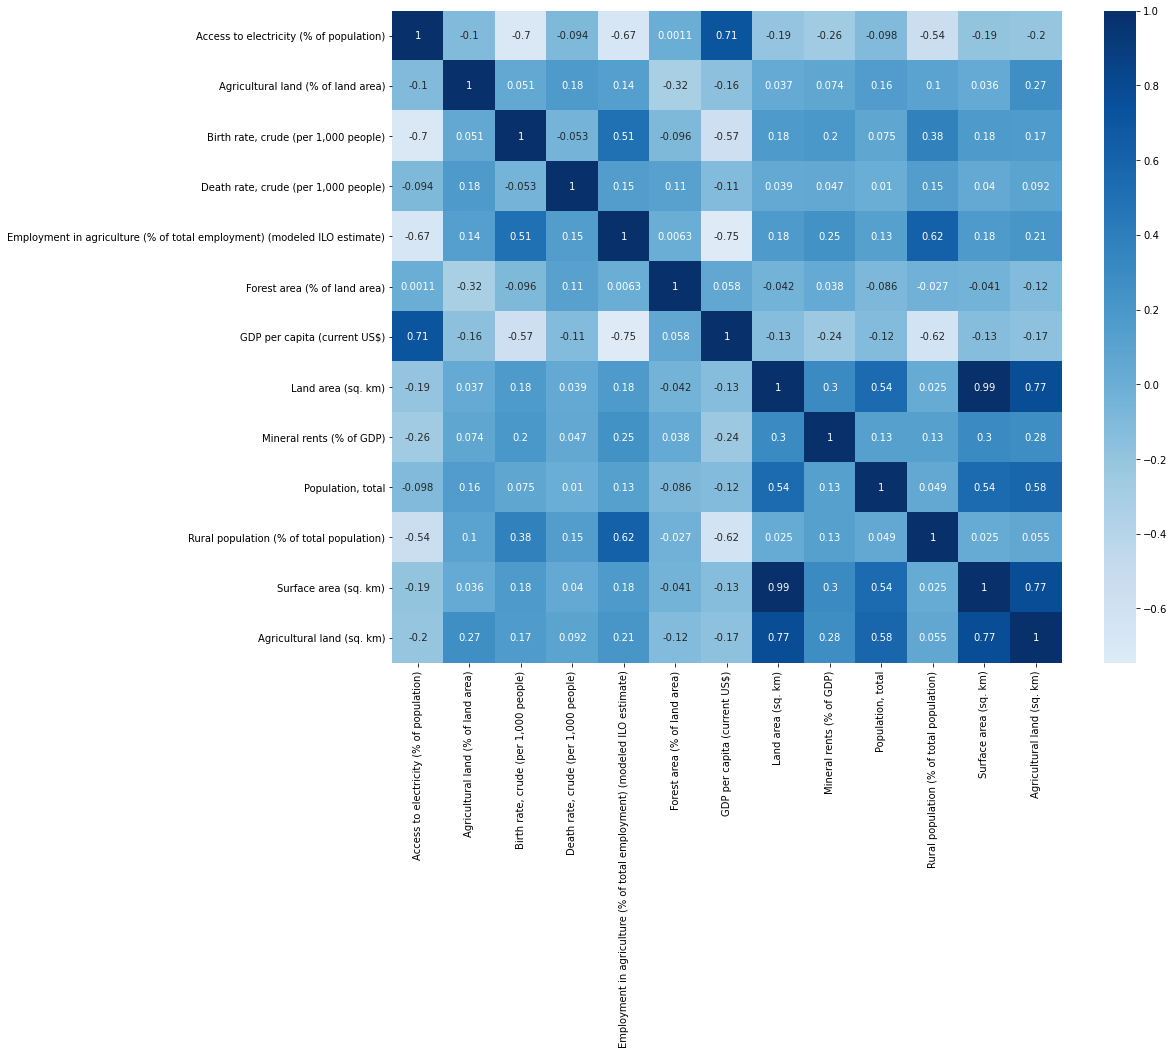

In [51]:
corrs = world_wide[features].corr(method = 'kendall')

plt.figure(figsize=(15,12))
sns.heatmap(corrs, cmap='Blues', center=0, annot = True);

**found some!**

wow! theres Correlations that shows us a perfect match (0.99) between\
Surface area (sq. km) **&** Land area (sq. km).\
**but** it is quite clear that there is a strong connection between them, still perfect match Requires visual check.

In [52]:
world_wide.loc[:,['Surface area (sq. km)','Land area (sq. km)']]

,Surface area (sq. km),Land area (sq. km)
Country,,
Afghanistan,6.528600e+05,6.528600e+05
Albania,2.875000e+04,2.740000e+04
Algeria,2.381740e+06,2.381740e+06
Angola,1.246700e+06,1.246700e+06
Argentina,2.780400e+06,2.736690e+06
...,...,...
"Venezuela, RB",9.120500e+05,8.820500e+05
Vietnam,3.306790e+05,3.101886e+05
"Yemen, Rep.",5.279700e+05,5.279700e+05


<AxesSubplot:>

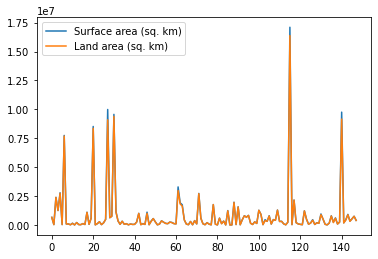

In [53]:
world_wide.loc[:,['Surface area (sq. km)','Land area (sq. km)']].plot(use_index=False)

There are countries that got excactly the same sq.km in both columns, that showed us land area isnt Precise.\
we'll drop it from the features and start again.

In [54]:
features.remove('Land area (sq. km)')

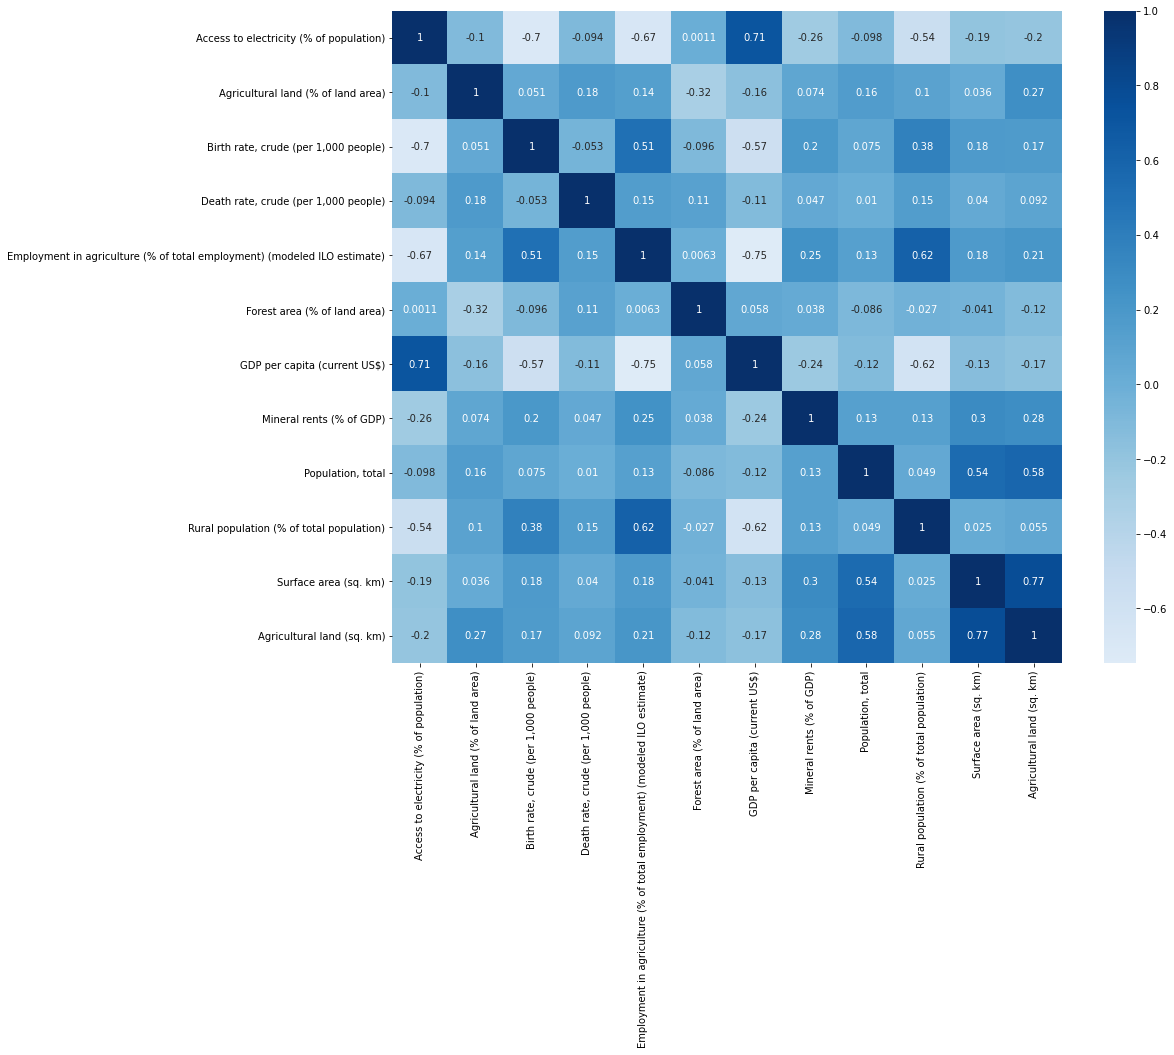

In [55]:
corrs = world_wide[features].corr(method = 'kendall')

plt.figure(figsize=(15,12))
sns.heatmap(corrs, cmap='Blues', center=0, annot = True);

moving to the next strong Correlation conection between(0.77):\
Surface area (sq. km) **&** Agricultural land (sq. km)

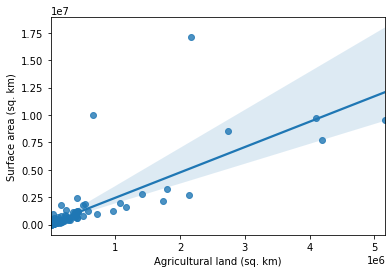

In [56]:
sns.regplot(x='Agricultural land (sq. km)', y='Surface area (sq. km)', data=world_wide);

---
## conclusion 1

There is similar behavior of countries all over the world.\
**The larger the surface area, the larger the agricultural area.**

---

## What about the economy and wealth of the country? And how does it affect?

moving to the next stong Correlation between:\
GDP per capita (current US$) **&** Employment in agriculture (% of total employment) (modeled ILO estimate)

### what is GDP?
gross domestic product

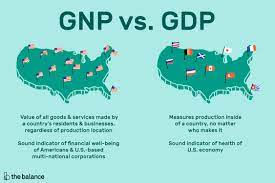

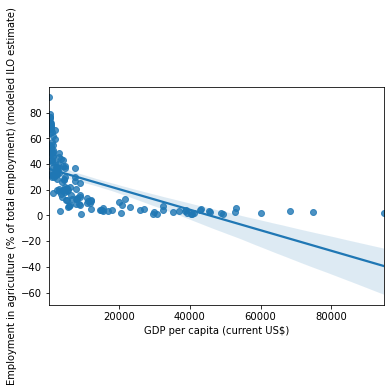

In [57]:
sns.regplot(x='GDP per capita (current US$)'\
            , y='Employment in agriculture (% of total employment) (modeled ILO estimate)', data=world_wide);

According to the current graph, it is difficult to see the relations behavior..\
Let's reduce the GDP limit.

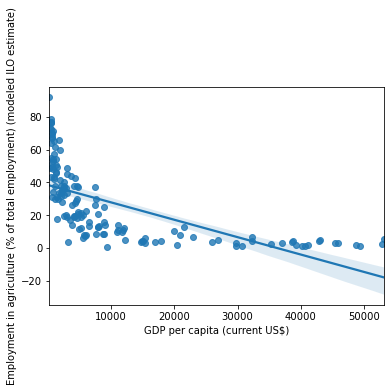

In [58]:
sns.regplot(x='GDP per capita (current US$)'\
            , y='Employment in agriculture (% of total employment) (modeled ILO estimate)', data=world_wide\
           [world_wide['GDP per capita (current US$)'] < 60000]);

Now we can conclude the relationship, we notice that the graph is divided into 2 different behaviors.

**1. when GDP<20k:** The percentage of employment in agriculture decreases significantly when the value of GDP increases.

**2. when GDP>20k:** When GDP rise above the 20k limit the percentage of agricultural employment in the country aims to 0!

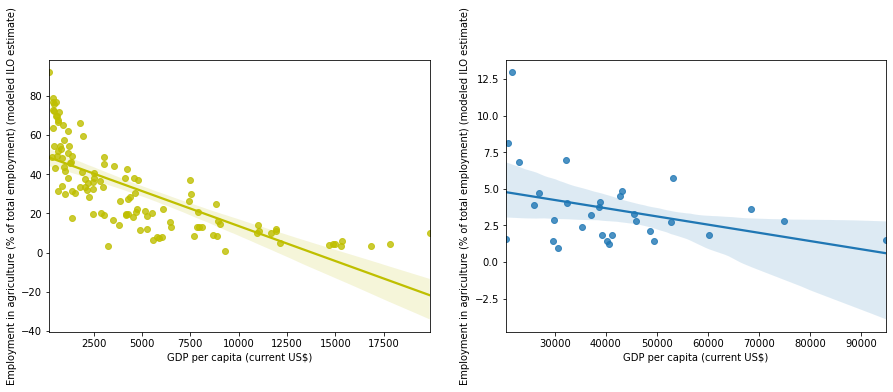

In [59]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
first_plt = sns.regplot(x='GDP per capita (current US$)'\
            , y='Employment in agriculture (% of total employment) (modeled ILO estimate)', data=world_wide\
           [world_wide['GDP per capita (current US$)'] < 20000], color="y" ,ax=axes[0]);
second_plt = sns.regplot(x='GDP per capita (current US$)'\
            , y='Employment in agriculture (% of total employment) (modeled ILO estimate)', data=world_wide\
           [world_wide['GDP per capita (current US$)'] > 20000],ax=axes[1]);

In addition we can say that:
GDP<20k==Poor contries.
GDP>20K==Rich contries.

---
## conclusion 2

The percentage of agricultural employment in poor countries  is large.\
while the employment of agriculture in the rich and developed countries has almost ceased to exist.

---

### But is GDP is a measure that can determine the quality of a countries citizen's life?

This measure has a disadvantage, it measures the wealth of the country.\
but a rich country does not necessarily indicate rich citizens.

There are countries rich in oil and thus the GDP measurement is quite high,\
the citizens of the country live in poverty and high unemployment rates.

### So how can we point out countries with high GDP that are impacting for the benefit of the citizens?

to answer that question, Let's look for more connections between GDP and indicators that indicate the quality of life of citizens.\
**Access to electricity (% of population) & Rural population (% of total population)**

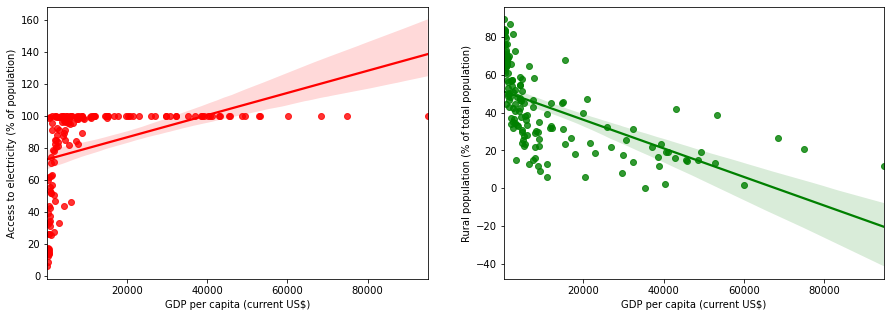

In [60]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
first_plt = sns.regplot(x='GDP per capita (current US$)'\
            , y='Access to electricity (% of population)', data=world_wide, color="r" ,ax=axes[0]);
second_plt = sns.regplot(x='GDP per capita (current US$)'\
            , y='Rural population (% of total population)', data=world_wide, color="g" ,ax=axes[1]);

**found some good news :)**\
it seems that GDP measure can indicate us the citizen's quality life after all!

---
## conclusion 3

GDP has been shown to be effective in measuring the basic standard of living of the citizens in certain countries.

---

# Summary

**According to the data, the countries of the world behave similarly in many cases. this gives us the potential to diagnose and draw important conclusions about the behavior of the modern world.**